In [4]:
# 03/02/2025
# CONTROLLER
###################

from ipynb.fs.full.MLmodels import runModels
from ipynb.fs.full.preprocessing import dataPreProcessing


def controller(
    inFile = "../data/data2.csv", setNum = 1, inputDF = None, procs = ["clean", "predMap", "debiasing", "CFS", "splitSet"], 
    k = 10, tauRed = 0.8, inTestSize = 0.2, debiasingMode = "smote", run = True
):
  returnData = {}
  vars = dataPreProcessing(
      dsFile = inFile, set = setNum, df = inputDF, processes = procs, kFeatures = k, tauRedundancy = tauRed, testSize = inTestSize, debiasTechnique  = debiasingMode
  );
  df = vars["df"]

  if run and "splitSet" in procs:
    [Ypreds, models] = runModels(vars["Xtrain"], vars["Ytrain"], vars["Xtest"], modes = ["train", "test"])
    vars["Ypreds"] = Ypreds
    vars["models"] = models
  return vars

#vars = controller("../data/data2.csv", setNum = 2, inputDF = None, procs = ["clean", "predMap", "debiasing", "CFS", "splitSet"], k = 6, tauRed = 0.8, inTestSize = 0.2, debiasingMode = "over", run = True);
#Xtrain = vars["Xtrain"]
#Ytrain = vars["Ytrain"]
#Xtest = vars["Xtest"]
#Ytest = vars["Ytest"]

In [5]:
# 03/02/2025
# CONTROLLER - DOMAIN ADAPTED DATASET
###################

from ipynb.fs.full.MLmodels import runModels
from ipynb.fs.full.preprocessing import dataPreProcessing


def controllerDA(
    sourceFile = "../data/data1Encoded", targetFile = "../data/data2", sourceDF = None, targetDF = None, 
    procsSource = ["clean", "predMap", "debiasing", "splitSet"], procsTarget = ["clean", "predMap", "debiasing", "centreMean", "splitSet"], k = 10, tauRed = 0.8, 
    debiasingMode = "smote", run = True
):
  vars = {}
  varsSource = dataPreProcessing(dsFile = sourceFile, Dset = 1, df = sourceDF, processes = procsSource, debiasTechnique = debiasingMode, testSize = 0.0)
  varsTarget = dataPreProcessing(dsFile = targetFile, Dset = 2, df = targetDF, processes = procsTarget, debiasTechnique = debiasingMode, testSize = 0.0)
  dfS, dfT = varsSource["df"], varsTarget["df"]

  if run:
    [Ypreds, models] = runModels(varsSource["X"], varsSource["Y"], varsTarget["X"], modes = ["train", "test"])
    #print(Ypreds)
    vars["Ypreds"] = Ypreds
    vars["models"] = models
  return [varsSource, varsTarget, vars]

varsSource, varsTarget, vars = controllerDA(procsSource = ["splitSet"], procsTarget = ["clean", "predMap", "debiasing", "splitSet"], k = 6, tauRed = 0.8, debiasingMode = "smote", run = True);
Xtrain = varsSource["X"]
Ytrain = varsSource["Y"]
Xtest = varsTarget["X"]
Ytest = varsTarget["Y"]
print(vars["models"])

Number of NANs in data set 2 : Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
Preparing to interpolate NANs...
Number of NANs now:  Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
{'Ypred_regModel': 'training complete', 'Ypred_svmModel': 'training complete', 'Ypred_nbcModel': 'training complete', 'Ypred_knnModel': 'training complete', 'Ypred_dtModel': 'training complete'}


/home/saatvikk/uni/yr3/bigboiproject/src/preprocessing.ipynb:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  "\n",


{'regModel': <ipynb.fs.full.MLmodels.logReg object at 0x7f7db1a7f7f0>, 'svmModel': <ipynb.fs.full.MLmodels.supVecMac object at 0x7f7e11d0ada0>, 'nbcModel': <ipynb.fs.full.MLmodels.naiBayClass object at 0x7f7e11d0b520>, 'knnModel': <ipynb.fs.full.MLmodels.kNearNeigh object at 0x7f7e11d0ae60>, 'dtModel': <ipynb.fs.full.MLmodels.decTree object at 0x7f7e11d08850>}


In [6]:
##################################

# EVALUATE MODELS

##################################

In [7]:
# 12/2024
# NORMAL PERFORMANCE METRICS
from ipynb.fs.full.performance import performanceEval

# logistic reg
print("============= LOGISTIC REGRESSION MODEL PERFORMANCE =============")
regMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_regModel"], "Logistic Regression model")
print(regMetrics)
print("=================================================================")

# svm (linear kernel)
print("============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============")
svmLinMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_svmModel"], "SVM (Linear Kernel) model")
print(svmLinMetrics)
print("=================================================================")

# NBC
print("============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============")
nbcMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_nbcModel"], "NBC model")
print(nbcMetrics)
print("=================================================================")

# K-NN
print("============= K-NN MODEL MODEL PERFORMANCE =============")
knnMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_knnModel"], "K-NN model")
print(knnMetrics)
print("=================================================================")

# Decision Tree
print("============= DECISION TREE MODEL PERFORMANCE =============")
decTreeMetrics = performanceEval(Ytest, vars["Ypreds"]["Ypred_dtModel"], "K-NN model")
print(decTreeMetrics)
print("=================================================================")

============= LOGISTIC REGRESSION MODEL PERFORMANCE =============
Logistic Regression model  accuracy (in %): 73.7938295340108
Predicted     0      1    All
Actual                       
0          7533   3390  10923
1          2335   8588  10923
All        9868  11978  21846
{'accuracy': 73.7938295340108, 'specificity': 68.96457017302939, 'sensitivity': 78.62308889499222, 'recall': 78.62308889499222, 'precision': 71.69811320754717}
============= SVM (LINEAR KERNEL) MODEL PERFORMANCE =============
SVM (Linear Kernel) model  accuracy (in %): 73.079739998169
Predicted     0      1    All
Actual                       
0          7314   3609  10923
1          2272   8651  10923
All        9586  12260  21846
{'accuracy': 73.079739998169, 'specificity': 66.95962647624279, 'sensitivity': 79.1998535200952, 'recall': 79.1998535200952, 'precision': 70.56280587275693}
============= NAIVE BAYES CLASSIFIER MODEL PERFORMANCE =============
NBC model  accuracy (in %): 79.63471573743477
Predicted     0

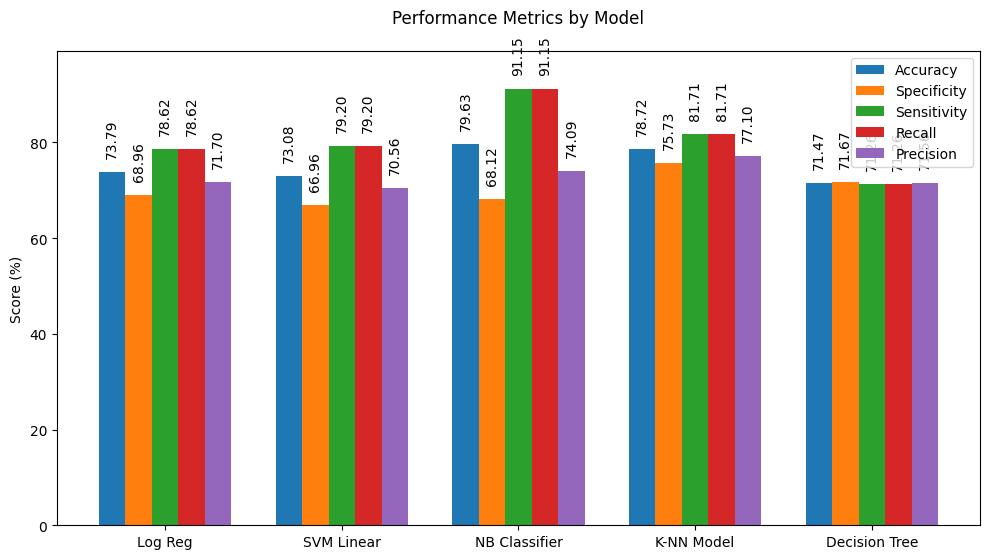

In [8]:
# 03/02/2025
import numpy as np
import matplotlib.pyplot as plt

# Bar Chart of Perf Metrics
modelNames = ["Log Reg", "SVM Linear", "NB Classifier", "K-NN Model", "Decision Tree"]
modelMetrics = [regMetrics, svmLinMetrics, nbcMetrics, knnMetrics, decTreeMetrics]
acc, spec, sen, rec, prec = [], [], [], [], []

# Extract metrics for each model
for metrics in modelMetrics:
    acc.append(metrics["accuracy"])
    spec.append(metrics["specificity"])
    sen.append(metrics["sensitivity"])
    rec.append(metrics["recall"])
    prec.append(metrics["precision"])

# Set up positions for grouped bars
x = np.arange(len(modelNames))  # Label locations for each model
width = 0.15                    # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
rects1 = ax.bar(x - 2 * width, acc, width, label="Accuracy")
rects2 = ax.bar(x - width, spec, width, label="Specificity")
rects3 = ax.bar(x, sen, width, label="Sensitivity")
rects4 = ax.bar(x + width, rec, width, label="Recall")
rects5 = ax.bar(x + 2 * width, prec, width, label="Precision")

# Find the maximum metric value to set the top margin
y_max = max(acc + spec + sen + rec + prec)
ax.set_ylim(0, y_max + 8)  # Increase the limit more so the labels don't hit the title

# Add labels, title, and custom x-axis tick labels, etc.
# The "pad" parameter moves the title further above the plot
ax.set_title('Performance Metrics by Model', pad=20)
ax.set_ylabel('Score (%)')
ax.set_xticks(x)
ax.set_xticklabels(modelNames)
ax.legend()

# Function to add labels above each bar with vertical text
def autolabel(rects):
    """Attach a vertically rotated text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 10),          # Increase offset to 10 points above the bar
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90,
                    clip_on=False)

# Label each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

# Make room for the labels by adjusting the layout,
# and add a bit more space above if needed:
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [9]:
##################################

# best k so far = 6 (w tauRed = 0.8) (FOR DATA SET 1)
# best k so far = 6 (w tauRed = 0.8) (FOR DATA SET 1)


##################################